In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
del df['Cabin']
del df['Embarked']

Filling the missing values of ages

In [9]:
df['Age'].fillna(df['Age'].mean(),inplace = True)

In [10]:
df.duplicated().sum()

0

Survival analysis

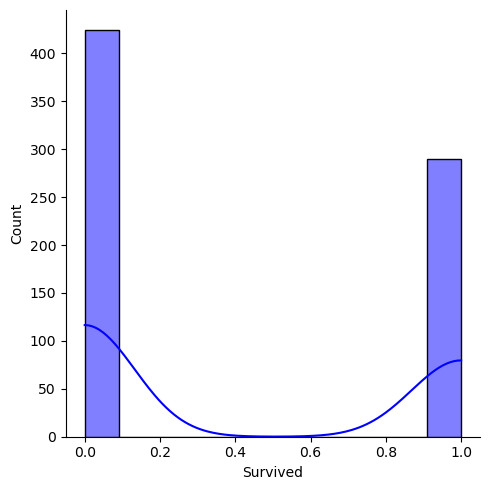

In [36]:
sns.displot(df['Survived'] , kde = True, color='blue')

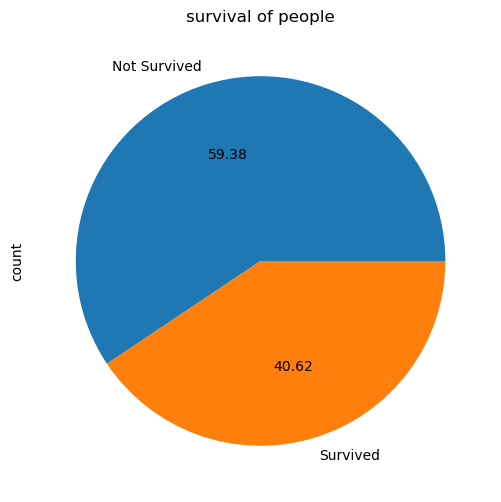

In [16]:
df['Survived'].value_counts().plot(kind='pie', autopct = "%.2f",figsize = (6,6), labels=['Not Survived' , 'Survived'])
plt.title('survival of people')
plt.show()

In [21]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

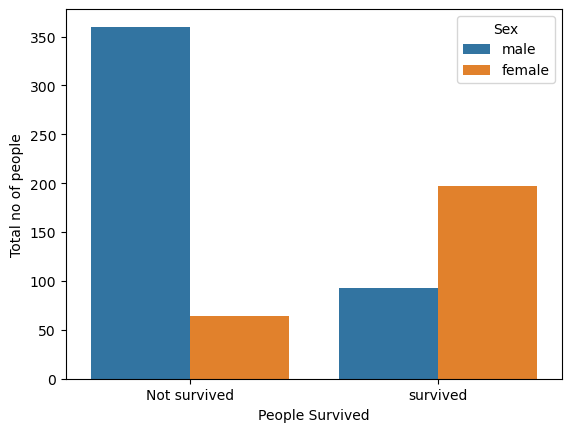

In [24]:
sns.countplot(x='Survived',hue='Sex',data=df,)
plt.xlabel("People Survived")
plt.ylabel("Total no of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

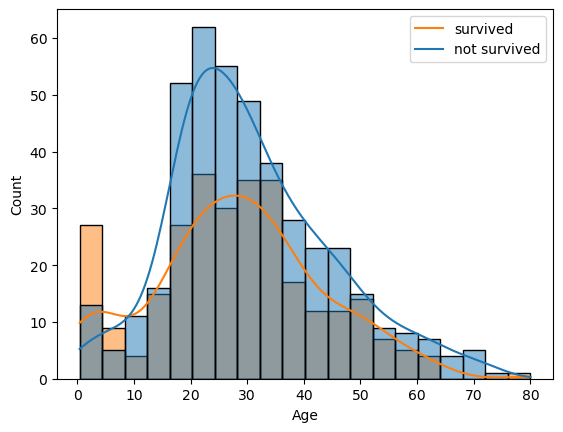

In [39]:
sns.histplot(x='Age',hue='Survived',data=df,kde=True)
plt.legend(labels=['survived','not survived'])
plt.show()

<Axes: xlabel='Age', ylabel='count'>

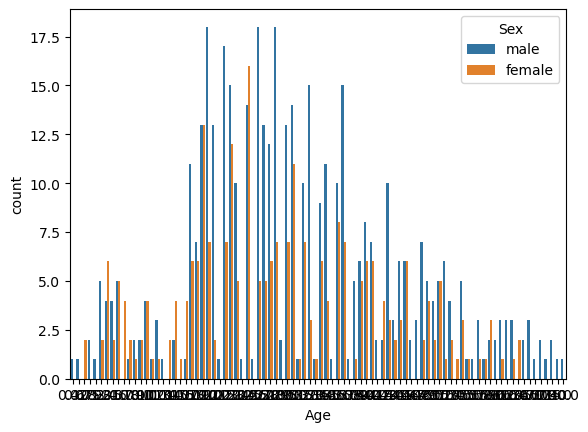

In [30]:
sns.countplot(x='Age',hue='Sex',data=df,)

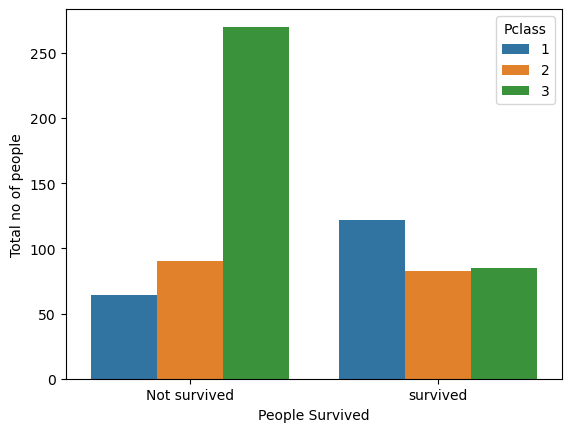

In [31]:
sns.countplot(x='Survived',hue='Pclass',data=df,)
plt.xlabel("People Survived")
plt.ylabel("Total no of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

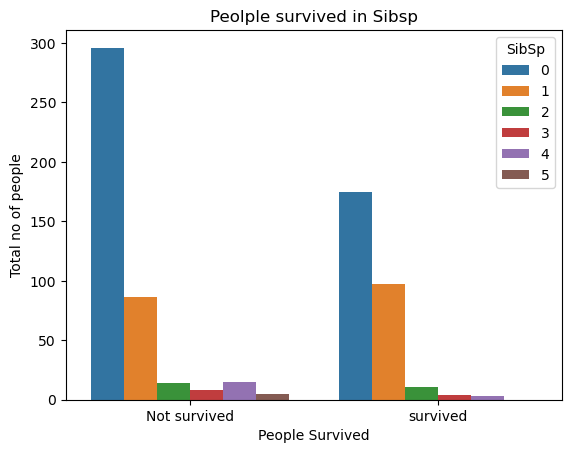

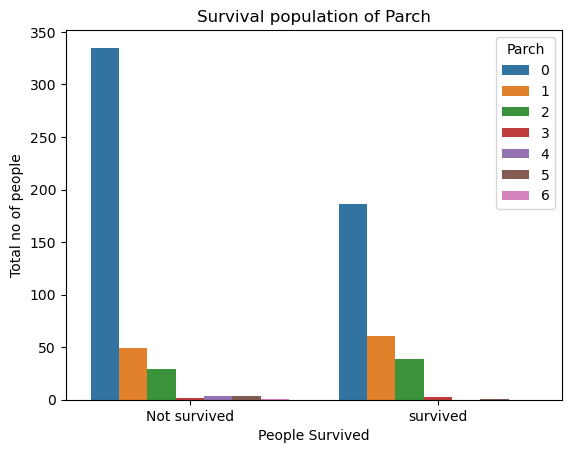

In [34]:
sns.countplot(x ='Survived', hue='SibSp',data=df)
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.xlabel("People Survived")
plt.ylabel("Total no of people")
plt.title("Peolple survived in Sibsp")
plt.show()

sns.countplot(x ='Survived',hue='Parch',data=df)
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.title("Survival population of Parch")
plt.xlabel("People Survived")
plt.ylabel("Total no of people")
plt.show()

In [35]:
df.corr(numeric_only=True)

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
index,1.000000,1.000000,0.029340,-0.035349,0.036847,-0.082398,-0.011617,0.009592
PassengerId,1.000000,1.000000,0.029340,-0.035349,0.036847,-0.082398,-0.011617,0.009592
Survived,0.029340,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.035349,-0.035349,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182
Age,0.036847,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.082398,-0.082398,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329
Parch,-0.011617,-0.011617,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119
Fare,0.009592,0.009592,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000


<Axes: >

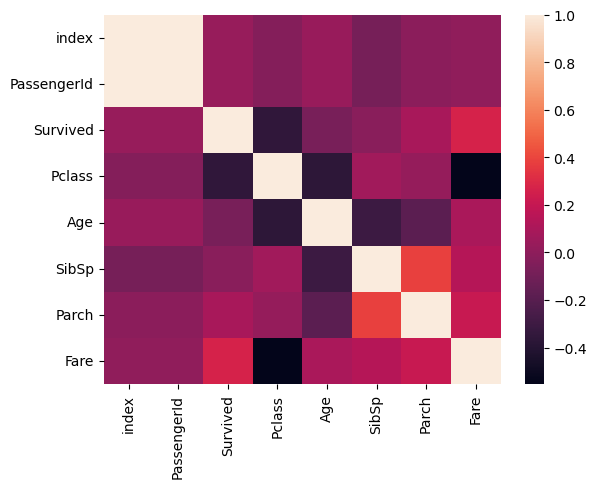

In [40]:
sns.heatmap(df.corr(numeric_only=True))

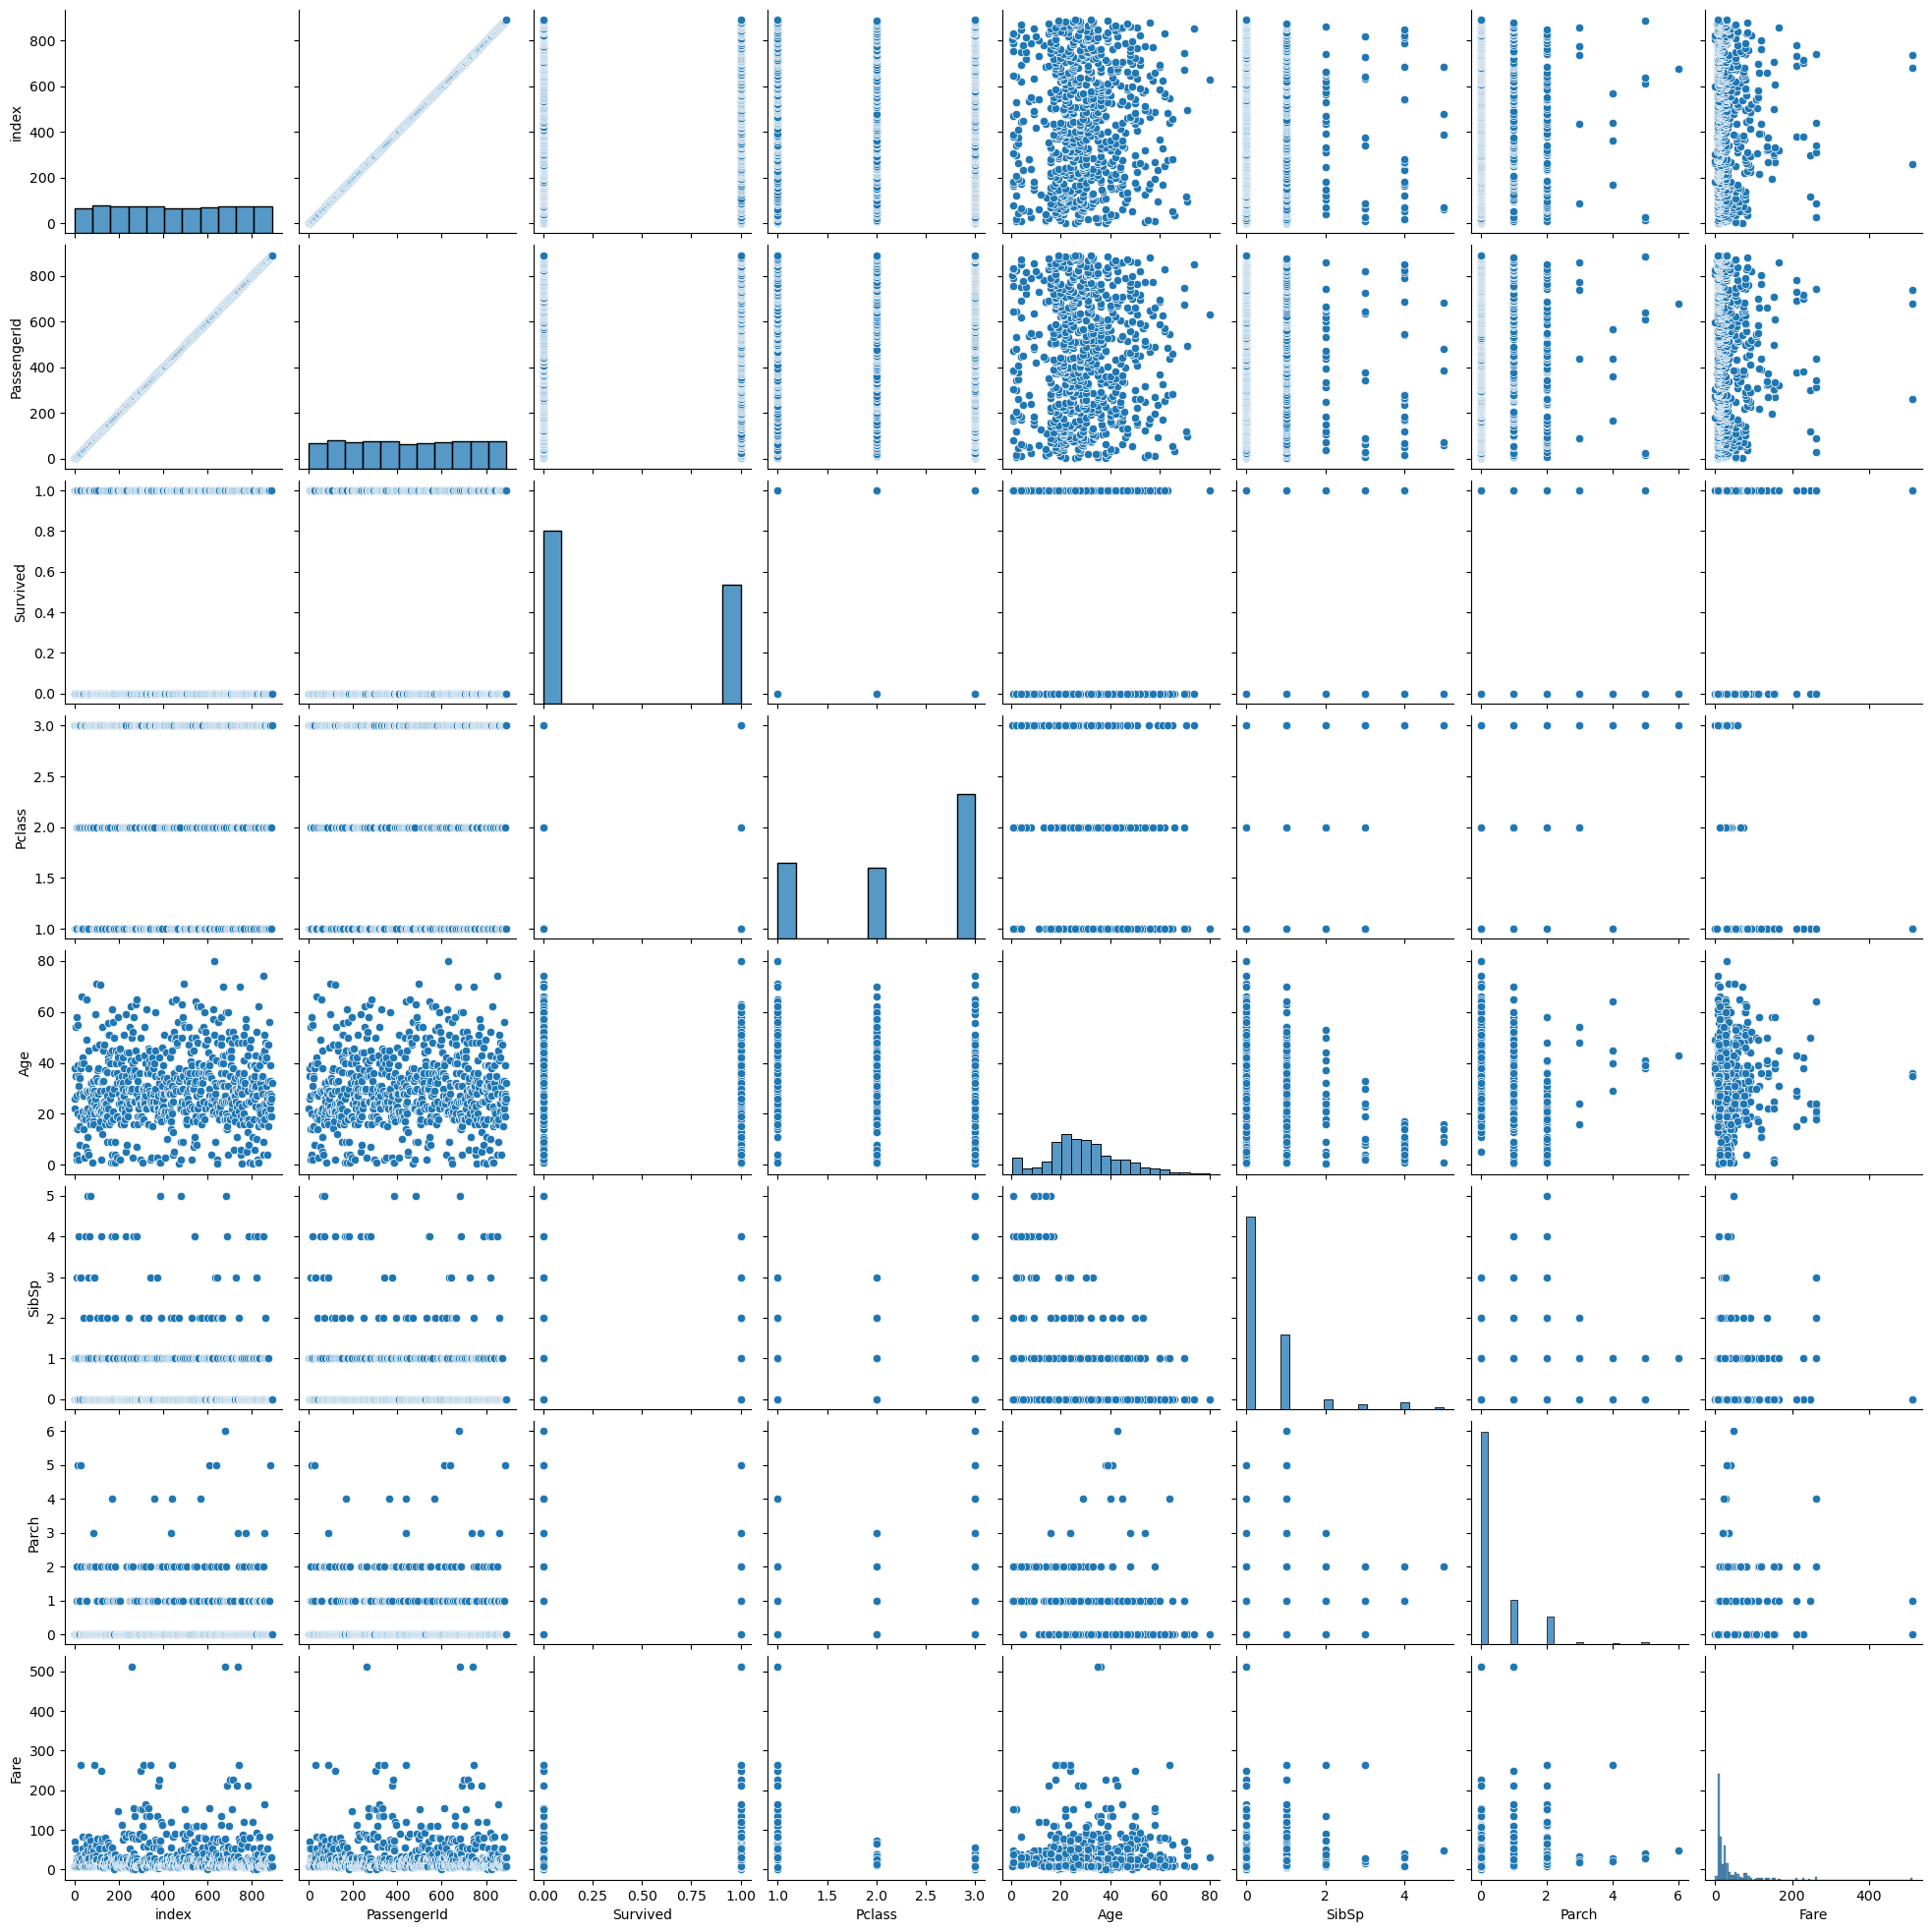

In [41]:
sns.pairplot(df)